In [3]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from PEPit.functions import SmoothStronglyConvexFunction,SmoothStronglyConvexQuadraticFunction
from src.algorithm import gradient_descent, nesterov_accelerated_gradient
from src.generate_sample import generate_trajectories, generate_P_beta, marchenko_pastur

In [6]:
matrix_generation = marchenko_pastur
function_class = SmoothStronglyConvexQuadraticFunction
params = {'N': 10, 'd': 100, 'mu': 0.0, 'L': 1.0, 'R': 1.0, 'K_max': 20, 'K': 0, 't': 1/1.0}

x0 = np.zeros(params['d'])
x0[0] = params['R']
trajectories_gd, avg_trajectories_gd = generate_trajectories(params, x0, gradient_descent, marchenko_pastur, traj_seed=10)
trajectories_nag, avg_trajectories_nag = generate_trajectories(params, x0, nesterov_accelerated_gradient, marchenko_pastur, traj_seed=10)

# params_oos = params.copy()
# params_oos['N'] = 100000
# x0 = np.zeros(params_oos['d'])
# x0[0] = params_oos['R']
# gd_oos, avg_gd_oos = generate_trajectories(params_oos, x0, gradient_descent, marchenko_pastur, traj_seed=10)
# nag_oos, avg_nag_oos = generate_trajectories(params_oos, x0, nesterov_accelerated_gradient, marchenko_pastur, traj_seed=10)

In [18]:
pep_gd, pep_nag = [], []
exp_gd, exp_nag = [], []
exp_avg_gd, exp_avg_nag = [], []
cvar_gd, cvar_nag = [], []
avg_cvar_gd, avg_cvar_nag = [], []
cvar_t_gd, cvar_t_nag = [], []
avg_cvar_t_gd, avg_cvar_t_nag = [], []
sample_mean_gd, sample_mean_nag = [], []


# result_dict = {'epsi_list': epsi_list, 'alpi_list': alpi_list, 'PEP': pepit_tau,  \
#                 'EXP': np.array(EXP_result), 'avg_EXP': np.array(avg_EXP_result), \
#                 'CVAR': np.array(CVAR_result), 'avg_CVAR': np.array(avg_CVAR_result), \
#                 'CVAR_t': np.array(CVAR_t_result), 'avg_CVAR_t': np.array(avg_CVAR_t_result), \
#                 'sample_quantile': sample_quantile, 'sample_mean': sample_mean, \
#                 'algorithm': algorithm.__name__, 'matrix': matrix_generation.__name__, 'function': function_class.__name__
#                 }

sample_dict = np.load(f'result/{function_class.__name__}/gradient_descent_K0_over_0.npy', allow_pickle=True).item()
epsi_list = sample_dict['epsi_list']
alpi_list = sample_dict['alpi_list']

K_max = 17
for K in range(K_max) :
    dict_name = f'result/{function_class.__name__}/scaled_eps/gradient_descent_K{K}_over_{K}.npy'
    result_dict_gd = np.load(dict_name, allow_pickle=True).item()

    dict_name = f'result/{function_class.__name__}/scaled_eps/nesterov_accelerated_gradient_K{K}_over_{K}.npy'
    result_dict_nag = np.load(dict_name, allow_pickle=True).item()

    pep_gd.append(result_dict_gd['PEP'])
    pep_nag.append(result_dict_nag['PEP'])

    exp_gd.append(result_dict_gd['EXP'])
    exp_avg_gd.append(result_dict_gd['avg_EXP'])
    exp_nag.append(result_dict_nag['EXP'])
    exp_avg_nag.append(result_dict_nag['avg_EXP'])

    cvar_gd.append(result_dict_gd['CVAR'])
    avg_cvar_gd.append(result_dict_gd['avg_CVAR'])
    cvar_nag.append(result_dict_nag['CVAR'])
    avg_cvar_nag.append(result_dict_nag['avg_CVAR'])
    
    cvar_t_gd.append(result_dict_gd['CVAR_t'])
    avg_cvar_t_gd.append(result_dict_gd['avg_CVAR_t'])
    cvar_t_nag.append(result_dict_nag['CVAR_t'])
    avg_cvar_t_nag.append(result_dict_nag['avg_CVAR_t'])

    sample_mean_gd.append(result_dict_gd['sample_mean'])
    sample_mean_nag.append(result_dict_nag['sample_mean'])

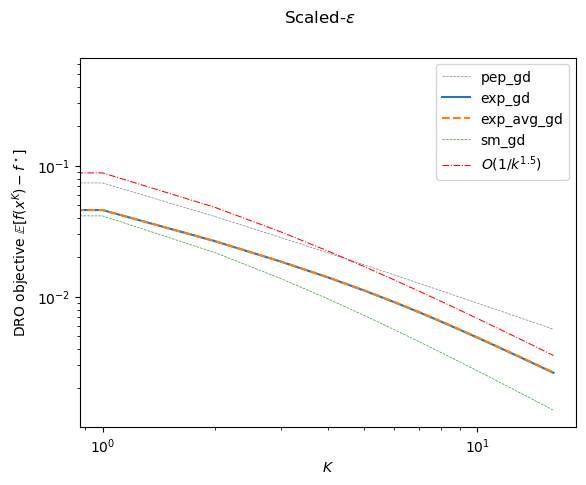

In [20]:
epsi_idx = 2

plt.plot(pep_gd, label='pep_gd', color='gray', linewidth=0.5, linestyle='--')
# plt.plot(pep_nag, label='pep_nag', color='k', linewidth=0.5, linestyle='--')

plt.plot(np.array(exp_gd)[:,epsi_idx], label='exp_gd')
# plt.plot(np.array(exp_nag)[:,epsi_idx], label='exp_nag')

plt.plot(np.array(exp_avg_gd)[:,epsi_idx], label='exp_avg_gd', linestyle='--')
# plt.plot(np.array(exp_avg_nag)[:,epsi_idx], label='exp_avg_nag', linestyle='--')

plt.plot(sample_mean_gd, label='sm_gd', linewidth=0.5, linestyle='--')
# plt.plot(sample_mean_nag, label='sm_nag', linewidth=0.5, linestyle='--')

plt.plot(.25/np.arange(1, K_max+1)**1.5, linestyle='-.', color='red', linewidth=0.75, label='$O(1/k^{1.5})$')

plt.xscale('log')
plt.yscale('log')

plt.suptitle(f'Scaled-$\\varepsilon$')
plt.xlabel('$K$')
plt.ylabel('DRO objective $\\mathbb{E}[f(x^K)-f^\\star]$')
plt.legend()

<>:15: SyntaxWarning: invalid escape sequence '\l'
<>:15: SyntaxWarning: invalid escape sequence '\l'
/var/folders/5m/48fmkm_53jg7n9drw6s3g15m0000gn/T/ipykernel_22308/3693709578.py:15: SyntaxWarning: invalid escape sequence '\l'
  plt.plot(np.log(np.arange(1, K_max+1))/np.arange(1, K_max+1)**3, linestyle='-.', color='red', linewidth=0.75, label='$O(\log k / k^3)$')


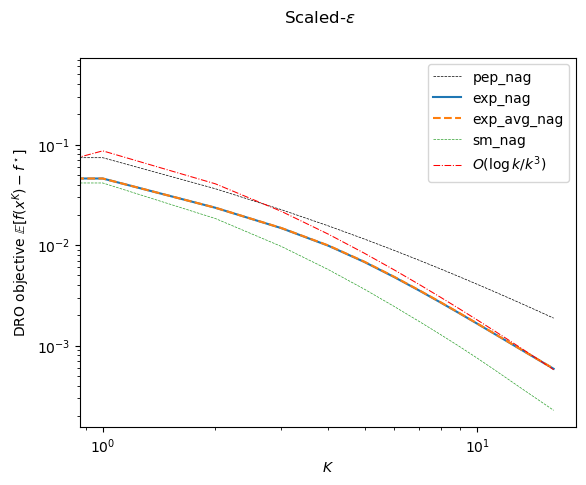

In [ ]:
epsi_idx = 2

# plt.plot(pep_gd, label='pep_gd', color='gray', linewidth=0.5, linestyle='--')
plt.plot(pep_nag, label='pep_nag', color='k', linewidth=0.5, linestyle='--')

# plt.plot(np.array(exp_gd)[:,epsi_idx], label='exp_gd')
plt.plot(np.array(exp_nag)[:,epsi_idx], label='exp_nag')

# plt.plot(np.array(exp_avg_gd)[:,epsi_idx], label='exp_avg_gd', linestyle='--')
plt.plot(np.array(exp_avg_nag)[:,epsi_idx], label='exp_avg_nag', linestyle='--')

# plt.plot(sample_mean_gd, label='sm_gd', linewidth=0.5, linestyle='--')
plt.plot(sample_mean_nag, label='sm_nag', linewidth=0.5, linestyle='--')

plt.plot(np.log(np.arange(1, K_max+1))/np.arange(1, K_max+1)**3, linestyle='-.', color='red', linewidth=0.75, label='$O(\log k / k^3)$')

plt.xscale('log')
plt.yscale('log')

plt.suptitle(f'Scaled-$\\varepsilon$ (NAG)')
plt.xlabel('$K$')
plt.ylabel('DRO objective $\\mathbb{E}[f(x^K)-f^\\star]$')
plt.legend()